# Feature Engineering

#### Import the required libraries

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline 

# Seaborn for visualization
import seaborn as sns

#### Import the cleaned dataset

In [2]:
# Load cleaned dataset from the previous lecture
df = pd.read_csv('cleaned_df.csv')
df.head(2)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,property_type,exterior_walls,roof
0,295850,2013,234,81,1,1,584,2013,0,0,107,9,30,19,89,6,58,33,65,84,3,Apartment / Condo / Townhouse,Wood Siding,missing
1,216500,2006,169,51,1,1,612,1965,0,1,105,15,6,13,87,2,14,39,73,69,3,Apartment / Condo / Townhouse,Brick,Composition Shingle


## I. Domain Knowledge

#### A. Popular Properties

2 bedroom and 2 bathroom properties are especially popular for investors. Let's create an indicator variable just for properties with 2 beds and 2 baths.

In [3]:
# Build your code step by step
#((df.beds == 2) & (df.baths == 2))
# ((df.beds == 2) & (df.baths == 2)).astype(int)

In [4]:
# Create indicator variable for properties with 2 beds and 2 baths
df['popular'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [5]:
# Check how many propoerties have 2 baths and 2 beds 
df.popular.value_counts()

0    1704
1     178
Name: popular, dtype: int64

#### B. Housing Market Recession

We are modeling housing prices in the United States, it's important to consider the housing market recession around 2008. According to data from Zillow, the lowest housing prices were from 2010 to end of 2013.

<br>
Create an indicator feature **recession**

Here's how:
* Your first condition `year_sold >= 2010`
* Your second condition `year_sold <= 2013`
* Combine the two conditions with an `&` operator
* Convert the resulting data to `int` type.

In [6]:
# Create a new variable recession
df['recession']=((df.year_sold >= 2010) & (df.year_sold <= 2013)).astype(int)

In [7]:
# Check how many propoerties were sold during recession period 
df.recession.value_counts()

0    1386
1     496
Name: recession, dtype: int64

In [11]:
fd = df[['year_sold','recession']]
fd.head(8)

,year_sold,recession
0,2013,1
1,2006,0
2,2012,1
3,2005,0
4,2002,0
5,2004,0
6,2011,1
7,2005,0


## II. Interaction Features

In the first step, you engineered features from domain knowledge. interaction features can be products, sums, or differences between two features.

#### A. Property Age

We have the features `year_sold` and the `year_built`. let's create a new feature `property_age`

In [116]:
# Create a property age feature
df['property_age'] = df.year_sold - df.year_built

Do a quick sanity check on that feature. Run `df.describe()` and check the stats for the feature `property_age`

In [117]:
# Do you see any error?
df.describe()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,popular,recession,property_age
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000
mean,422908.798618,2007.107864,466.903294,140.486716,3.421360,2.580765,2330.171626,1982.981403,12751.197131,0.880446,40.198193,4.501594,5.071732,5.323592,40.803401,3.386291,15.820404,38.604145,69.109989,65.073858,2.793305,0.094580,0.263549,24.126461
std,151473.251553,5.195851,231.653858,72.935379,1.068335,0.945125,1336.926475,20.287099,35304.268897,0.324525,46.876522,4.489725,8.465815,7.541060,53.553509,4.688951,17.660471,6.634615,19.649267,16.950137,0.505470,0.292712,0.440675,21.153271
min,200000.000000,1993.000000,88.000000,30.000000,1.000000,1.000000,500.000000,1880.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,1.000000,0.000000,0.000000,-8.000000
25%,300000.000000,2004.000000,320.000000,94.000000,3.000000,2.000000,1346.000000,1970.000000,1542.000000,1.000000,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,33.000000,58.000000,54.000000,3.000000,0.000000,0.000000,6.000000
50%,392000.000000,2007.000000,426.000000,125.000000,3.000000,3.000000,1907.500000,1986.000000,6074.000000,1.000000,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,10.000000,38.000000,73.000000,66.000000,3.000000,0.000000,0.000000,20.000000
75%,525000.000000,2011.000000,569.000000,169.000000,4.000000,3.000000,3005.000000,2000.000000,11761.000000,1.000000,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,21.000000,43.000000,84.000000,78.000000,3.000000,0.000000,1.000000,38.000000
max,800000.000000,2016.000000,4508.000000,1374.000000,5.000000,6.000000,8450.000000,2015.000000,436471.000000,1.000000,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,94.000000,69.000000,100.000000,100.000000,4.000000,1.000000,1.000000,114.000000


In [118]:
# Check number of observations with 'property_age' < 0
(df.property_age < 0).sum()

19

On second thought, this could be an error or that some homeowners buy houses before the construction company builts them. But for the purpose of this project we will remove these observations.

We'll do a quick ad-hoc data cleaning and remove these observations from our dataset.

#### Remove observations where `property_age` is less than 0.
* Keep only observations where `property_age` is 0 and above.

In [119]:
# Print df shape before
print(df.shape)

# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print(df.shape)

(1882, 27)
(1863, 27)


## III. Group Sparse Classes

**As a rule of thumb**, every class should have at least around 50 observations. Let's begin by plotting the `exterior_walls` feature

### A. Exterior walls 

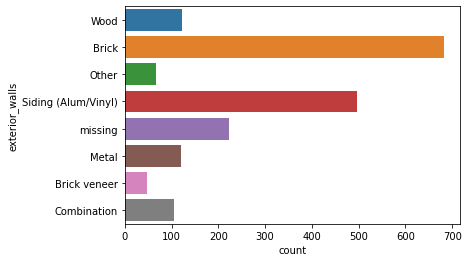

In [124]:
# count plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

Group/Replace <code style="color:crimson">'Wood Siding'</code> and <code style="color:crimson">'Wood Shingle'</code> with <code style="color:blue">'Wood'</code> class.


Group/Replace <code style="color:crimson">'Stucco'</code>, <code style="color:crimson">'Asbestos shingle'</code>, <code style="color:crimson">'Concrete Block'</code>, <code style="color:crimson">'Masonry'</code> , with <code style="color:blue">'Other'</code> class.

Remember to do `inplace= True`

In [122]:
# Group sparse classes in 'exterior_wall'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)
df.exterior_walls.replace(['Stucco', 'Asbestos shingle','Concrete Block','Masonry'], 'Other', inplace=True)


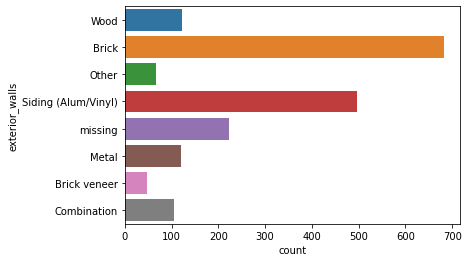

In [100]:
# Count plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

### B. Roof

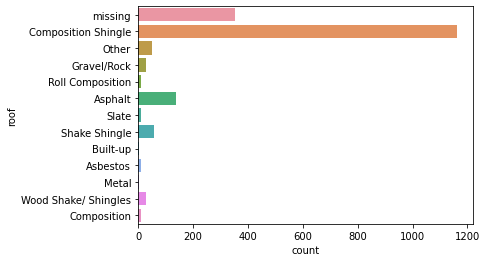

In [101]:
# Count plot for roof
sns.countplot(y='roof', data=df)
plt.show()


* Group/Replace <code style="color:crimson">'Gravel/Rock'</code>, <code style="color:crimson">'Roll Composition'</code>, <code style="color:crimson">'Slate'</code>, <code style="color:crimson">'Built-up'</code>, <code style="color:crimson">'Asbestos'</code>, and <code style="color:crimson">'Metal'</code> with <code style="color:crimson">'Other'</code>.

* Group <code style="color:crimson">'Composition'</code> and <code style="color:crimson">'Wood Shake/ Shingles'</code> into the <code style="color:crimson">'Composition Shingle'</code> class.

* Remember to do `inplace=True`


In [102]:
# Replace/Group 'Wood Siding' and 'Wood Shingle' to 'Wood'
df.roof.replace(['Gravel/Rock', 'Roll Composition','Slate','Built-up','Asbestos','Metal'], 'Other', inplace=True)
df.roof.replace(['Composition', 'Wood Shake/ Shingles'], 'Composition Shingle', inplace=True)


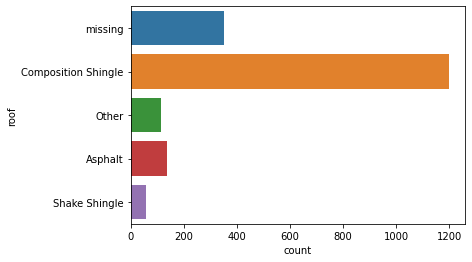

In [104]:
# Count plot for roof
sns.countplot(y='roof', data=df)
plt.show()

## IV. Dummy Variables

Most Machine Learning algorithms cannot handle text data. Therefore, we need to create what are called **dummy variables** for all our categorical features.
<br><br>
Pandas has an easy function for doing this automatically.
* `pd.get_dummies()`

In [106]:
# Create dummy variables for 'exterior_walls', 'roof', 'property_type'
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])
df.head(2)

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,popular,recession,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,roof_missing,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,2013,234,81,1,1,584,2013,0,0,107,9,30,19,89,6,58,33,65,84,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,216500,2006,169,51,1,1,612,1965,0,1,105,15,6,13,87,2,14,39,73,69,3,0,0,41,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### V. Drop Redundant Features

Beacuse we created a new feature `property_age` using features `year_built` and `year_sold`. We can drop those two features.

**Remove features 'year_built' and 'year_sold'** 
* Use Pandas's `.drop()` function.
* Remember to set `axis=1` because you are dropping columns.
* Remember to do 'inplace=True'.


In [108]:
# Drop 'year_built' and 'year_sold' from the dataset
df.drop(['year_built', 'year_sold'], axis=1, inplace=True)
df.head()

,price,property_tax,insurance,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,entertainment,sports,median_age,married,college_grad,num_schools,popular,recession,property_age,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,roof_Asphalt,roof_Composition Shingle,roof_Other,roof_Shake Shingle,roof_missing,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,234,81,1,1,584,0,0,107,9,30,19,89,6,58,33,65,84,3,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
1,216500,169,51,1,1,612,0,1,105,15,6,13,87,2,14,39,73,69,3,0,0,41,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,216,74,1,1,615,0,0,183,13,31,30,101,10,62,28,15,86,3,0,1,49,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
3,379900,265,92,1,1,618,33541,0,198,9,38,25,127,11,83,36,25,91,3,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,340000,88,30,1,1,634,0,0,149,7,22,20,83,10,73,37,20,75,3,0,0,10,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0


### Save the final dataset

We will save this dataset and train our model on it.

In [109]:
# Save the data as 'final.csv'
df.to_csv('final.csv', index=None)